#각 칼럼 설명


- Gender: 성별 ['Female', 'Male']
- Age: 나이 [float]
- Height: 키 [float]
- Weight: 몸무게 [float]
- family_history_with_overweight: 과체중 가족력 여부 [yes, no]
- FAVC: 고칼로리 음식 섭취 여부 [yes, no]
- FCVC: 야채 섭취 여부 [float]
- NCP: 주식 섭취 횟수 [float]
- CAEC: 간식 섭취 여부 ['Sometimes', 'Frequently', 'Always', 'no']
- SMOKE: 흡연 여부 [yes, no]
- CH2O: 일일 물 소비량 [float]
- SCC: 칼로리 소비 모니터링 여부 [yes, no]
- FAF: 물리적 활동 빈도 [float]
- TUE: 전자기기 사용하는 시간 [float]
- CALC: 알코올 소비 ['no', 'Sometimes', 'Frequently', 'Always']
- MTRANS: 교통수단 ['Public_Transportation', 'Walking', 'Automobile', 'Motorbike', 'Bike']
- NObeyesdad: 비만정도 ['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight','Obesity_Type_II', 'Obesity_Type_III']


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpld3

obesity_df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv")
obesity_order = ["Insufficient_Weight",
                 "Normal_Weight", 
                 "Overweight_Level_I", 
                 "Overweight_Level_II", 
                 "Obesity_Type_I", 
                 "Obesity_Type_II", 
                 "Obesity_Type_III"]

In [42]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [43]:
# 결측치 확인

obesity_df.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

결측치 존재하지 않음

In [44]:
obesity_df.corr()

C:\Users\pyk93\AppData\Local\Temp\ipykernel_12632\1540377548.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  obesity_df.corr()


,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
Age,1.000000,-0.025958,0.202560,0.016291,-0.043944,-0.045304,-0.144938,-0.296931
Height,-0.025958,1.000000,0.463136,-0.038121,0.243672,0.213376,0.294709,0.051912
Weight,0.202560,0.463136,1.000000,0.216125,0.107469,0.200575,-0.051436,-0.071561
FCVC,0.016291,-0.038121,0.216125,1.000000,0.042216,0.068461,0.019939,-0.101135
NCP,-0.043944,0.243672,0.107469,0.042216,1.000000,0.057088,0.129504,0.036326
CH2O,-0.045304,0.213376,0.200575,0.068461,0.057088,1.000000,0.167236,0.011965
FAF,-0.144938,0.294709,-0.051436,0.019939,0.129504,0.167236,1.000000,0.058562
TUE,-0.296931,0.051912,-0.071561,-0.101135,0.036326,0.011965,0.058562,1.000000


C:\Users\pyk93\AppData\Local\Temp\ipykernel_12632\1155711675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(obesity_df.corr(), annot = True, cmap = 'viridis')


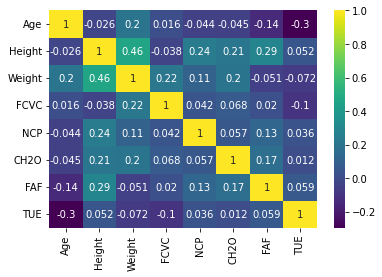

In [45]:
sns.heatmap(obesity_df.corr(), annot = True, cmap = 'viridis')
mpld3.save_html(plt.gcf(),"heatmap.html")
plt.show()


키와 몸무게는 역시나 상관관계가 존재함.  
나이와 전자기기 사용 시간은 약한 음의 상관관계.

In [46]:
obesity_df['NObeyesdad'].value_counts()

Obesity_Type_I         351
Obesity_Type_III       324
Obesity_Type_II        297
Overweight_Level_I     290
Overweight_Level_II    290
Normal_Weight          287
Insufficient_Weight    272
Name: NObeyesdad, dtype: int64

레이블 값 비율은 고만고만함.

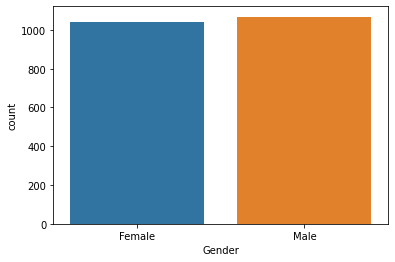

In [47]:
sns.countplot(x = obesity_df["Gender"])
mpld3.save_html(plt.gcf(),"gender_count.html")
plt.show()

성비도 비슷함

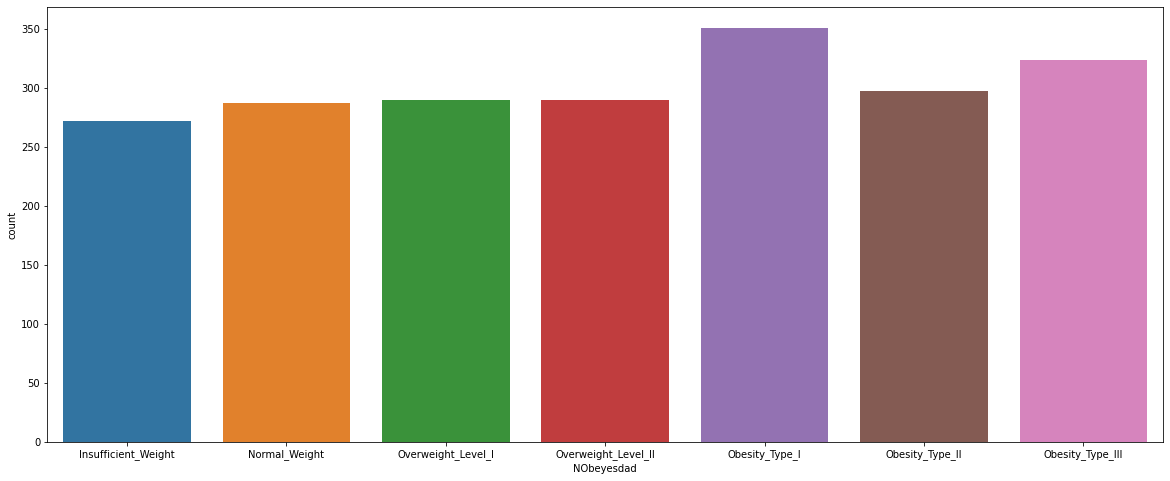

In [48]:
plt.figure(figsize = (20, 8))
sns.countplot(x = obesity_df["NObeyesdad"], order = obesity_order)
mpld3.save_html(plt.gcf(),"obey_type_count.html")
plt.show()

In [49]:
print(obesity_df[obesity_df.NObeyesdad == "Obesity_Type_II"].value_counts("Gender"))
print(obesity_df[obesity_df.NObeyesdad == "Obesity_Type_III"].value_counts("Gender"))


Gender
Male      295
Female      2
dtype: int64
Gender
Female    323
Male        1
dtype: int64


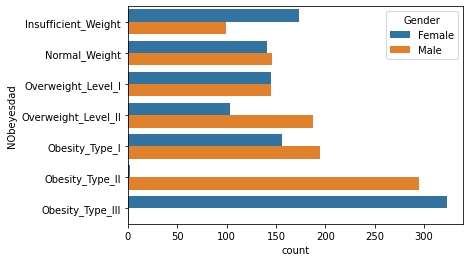

In [50]:
sns.countplot(y = obesity_df["NObeyesdad"], hue = obesity_df["Gender"], order = obesity_order)
mpld3.save_html(plt.gcf(),"obey_gender_countplot.html")
plt.show()

In [51]:
obesity_df["Age"].describe()

count    2111.000000
mean       24.312600
std         6.345968
min        14.000000
25%        19.947192
50%        22.777890
75%        26.000000
max        61.000000
Name: Age, dtype: float64

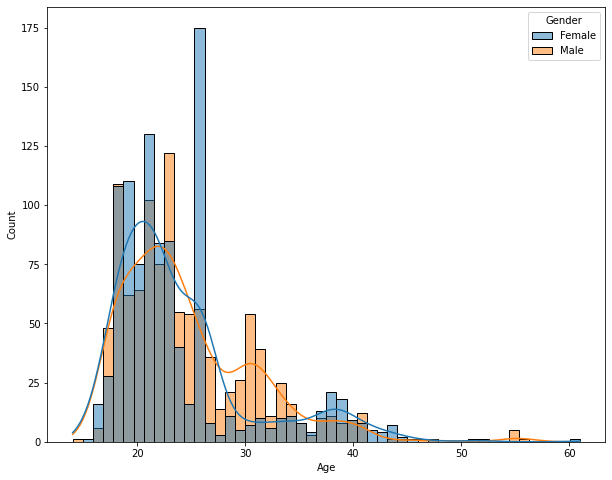

In [52]:
plt.figure(figsize = (10, 8))
sns.histplot(data = obesity_df, x = 'Age',hue = 'Gender', kde = True)
mpld3.save_html(plt.gcf(),"obey_gender_histogram.html")
plt.show()

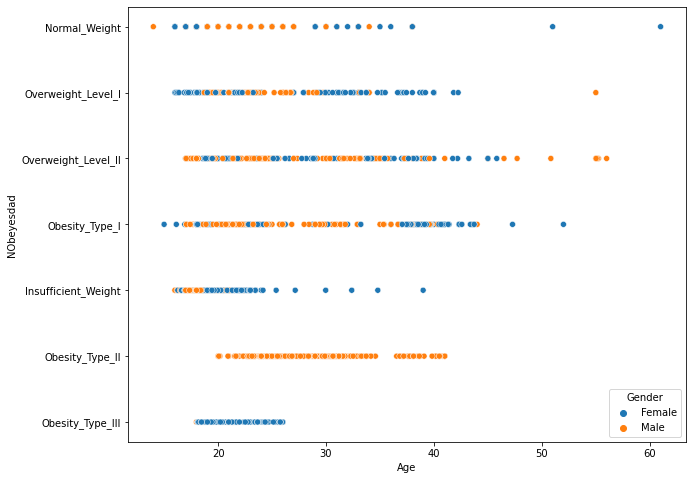

In [53]:
plt.figure(figsize = (10,8))
sns.scatterplot(x = 'Age', y = 'NObeyesdad', data = obesity_df, hue = 'Gender')
mpld3.save_html(plt.gcf(),"obey_gender_scatter.html")
plt.show()

## BMI 칼럼 생성

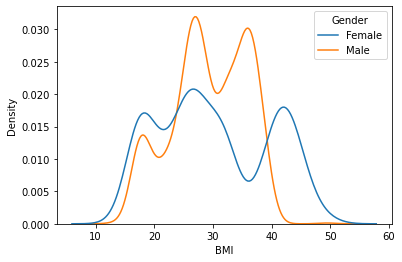

In [54]:
obesity_df["BMI"] = obesity_df["Weight"]/(obesity_df["Height"]**2)
sns.kdeplot(data=obesity_df, x="BMI", hue="Gender")
mpld3.save_html(plt.gcf(),"bmi_gender_kde.html")

성별과 BMI를 비교하면 경도/중정도 비만인 BMI [25, 40) 구간에서는 남성의 밀도가 높고, 고도 비만인 BMI [40, ∞) 구간에서는 여성의 밀도가 높다

## 비만 정도 그룹간의 연속형 변수 비교

C:\Users\pyk93\AppData\Local\Temp\ipykernel_12632\2382401159.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  groups = obesity_df.groupby("NObeyesdad").mean()


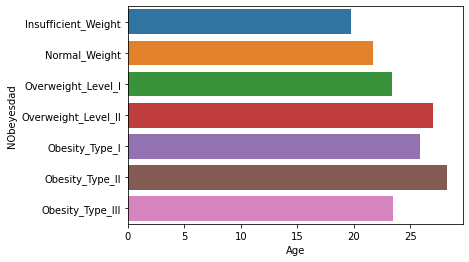

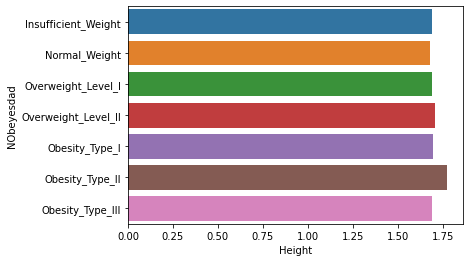

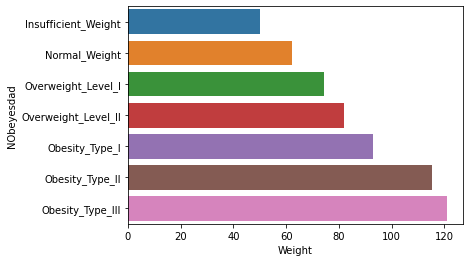

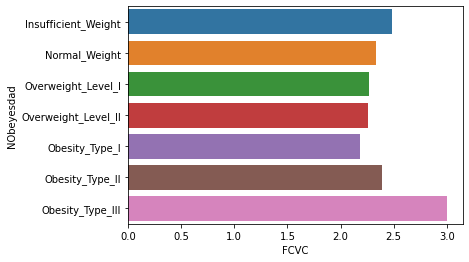

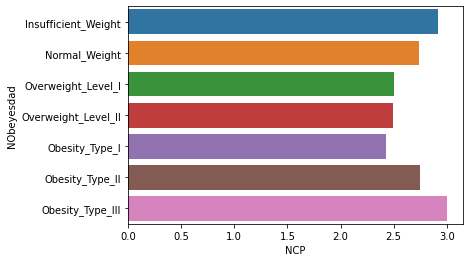

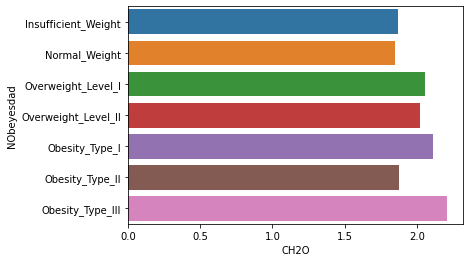

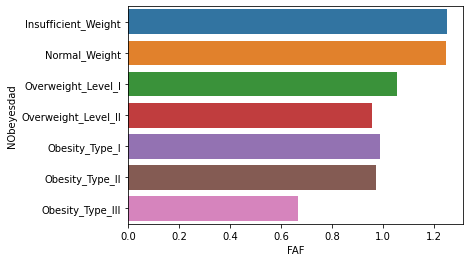

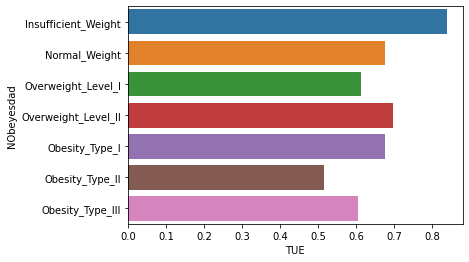

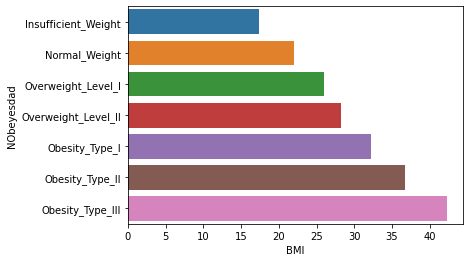

In [55]:
groups = obesity_df.groupby("NObeyesdad").mean()

#figure, axes = plt.subplots(9,1, constrained_layout=True, figsize=(12,32))

for i in range(len(groups.columns)):
  column = groups.columns[i]
  sns.barplot(y = groups.index, x = column, data = groups, order = obesity_order) # ax=axes[i]
  mpld3.save_html(plt.gcf(),f"NObeysdad_{column}_barplot.html")
  

  plt.show()

## 범주형 변수별 BMI 비교

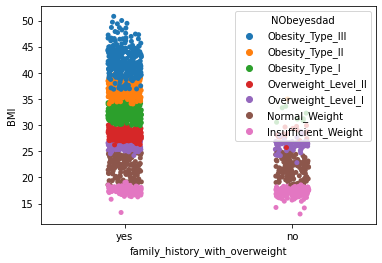

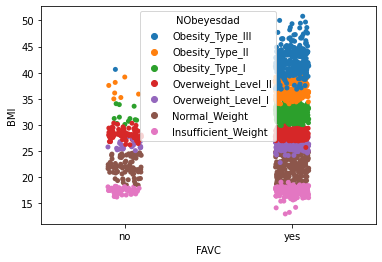

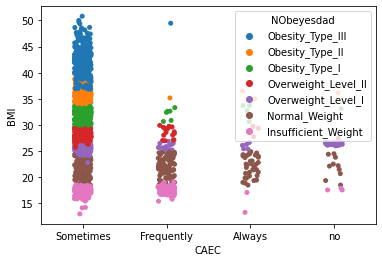

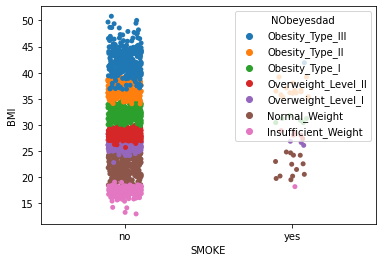

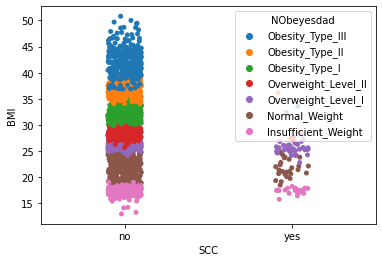

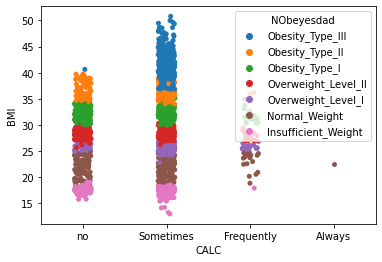

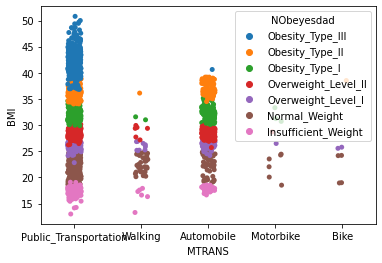

In [56]:
categories = ["family_history_with_overweight", "FAVC", "CAEC", "SMOKE", "SCC","CALC", "MTRANS"]
for category in categories:
  sns.stripplot(x=category, y="BMI", data=obesity_df, hue = "NObeyesdad", hue_order = list(reversed(obesity_order)))
  mpld3.save_html(plt.gcf(),f"BMI_{category}_stripplot.html")

  plt.show()

범주형 변수별 BMI 분포

가족력 여부
가족력이 있는 사람이 더욱 비만인 경우가 많다.

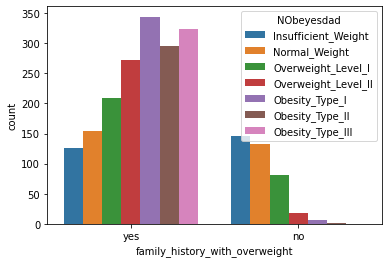

In [57]:
sns.countplot(x = 'family_history_with_overweight', hue = 'NObeyesdad', data = obesity_df, hue_order = obesity_order)
mpld3.save_html(plt.gcf(),"family_history_with_overweight_count.html")
plt.show()

FAVC(고칼로리 음식 섭취 여부)  
이 컬럼 역시 고칼로리 음식을 섭취할수록 비만인 경우가 많다.

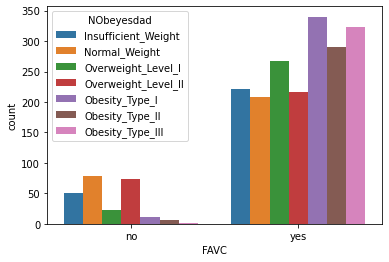

In [58]:
sns.countplot(x = 'FAVC', hue = 'NObeyesdad', data = obesity_df, hue_order = obesity_order)
mpld3.save_html(plt.gcf(),"favc_count.html")
plt.show()

FCVC(야채 섭취 여부)  
이 변수는 딱히 영향이 없는 것 같다

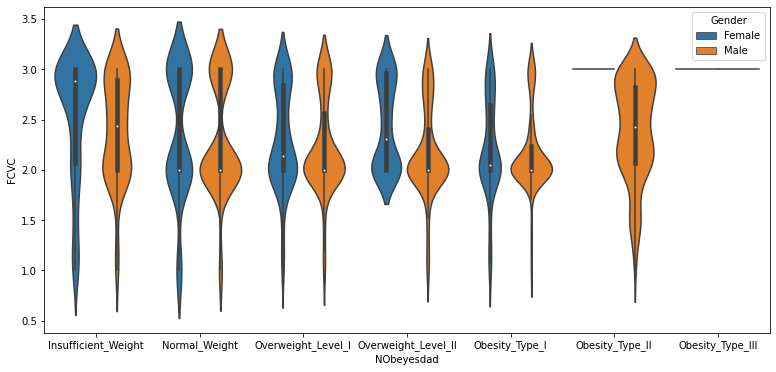

In [59]:
plt.figure(figsize = (13, 6))
sns.violinplot(data=obesity_df, x='NObeyesdad', y='FCVC', hue='Gender', order = obesity_order)
mpld3.save_html(plt.gcf(),"fcvc_violinplot.html")
plt.show()

NCP(주식 섭취 횟수)

Insufficient_Weight 컬럼의 NCP 수치가 상당히 높다..  
조금씩 먹는데 끼니를 꼬박꼬박 챙겨 먹나?

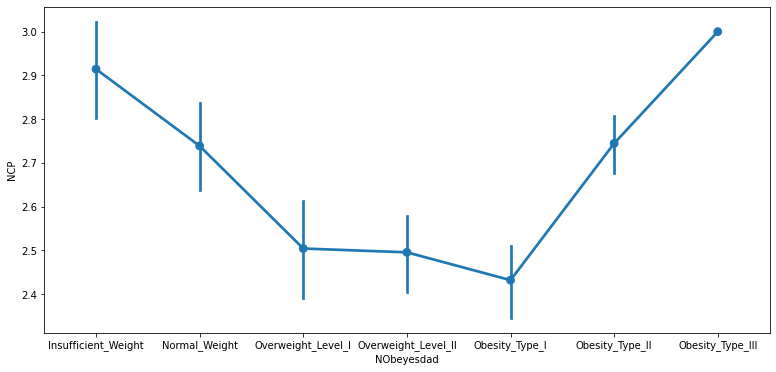

In [60]:
plt.figure(figsize = (13, 6))
sns.pointplot(x = 'NObeyesdad', y = 'NCP', data = obesity_df, order = obesity_order)
mpld3.save_html(plt.gcf(),"ncp_pointplot.html")
plt.show()